In [2]:
# declaration for library
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import statsmodels.api as sm

In [3]:
# importing the data
Titanic_read=pd.read_csv(r"C:\Users\venkatesh\Downloads\Titanic.csv")

In [4]:
Titanic_read.head()
Titanic_read.corr(method='pearson')



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
Titanic_read.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
Titanic_read.shape

(891, 12)

In [6]:
Titanic_read.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1]:
Titanic_read.describe(include= "all")
total=Titanic_read.isnull().sum()
percentage=(Titanic_read.isnull().sum()/len(Titanic_read))*100
per=round(percentage, 1)
missingdata=pd.concat([total,per],axis=1,keys=['Total','%'])
missingdata

NameError: name 'Titanic_read' is not defined

male_percentage= 18.890814558058924
female_percentage= 74.20382165605095


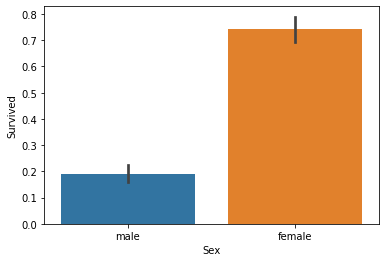

In [8]:
# observation 
# There are 19.86 percentage of missing values in Age
# There are 77.10 percentage of missing values in Cabin.
# sex feature
import seaborn as sns
sns.barplot(x="Sex",y="Survived",data=Titanic_read)
print('male_percentage=',Titanic_read["Survived"][Titanic_read["Sex"]=="male"].value_counts(normalize="true")[1]*100)

print('female_percentage=',Titanic_read["Survived"][Titanic_read["Sex"]=="female"].value_counts(normalize="true")[1]*100)




  

% of first class people: 62.96296296296296
% of secpnd class people: 47.28260869565217
% of Third class people: 24.236252545824847


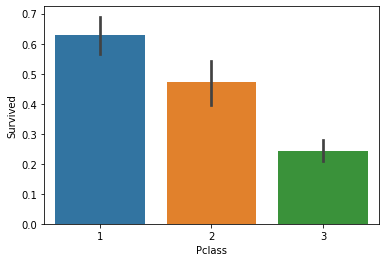

In [9]:
# observation - Female passengers has more survival rate. hence sex feature is important for predictions.

# Pclass feature
sns.barplot(x="Pclass",y="Survived",data=Titanic_read)

print("% of first class people:", Titanic_read["Survived"][Titanic_read["Pclass"]==1].value_counts(normalize="true")[1]*100)
print("% of secpnd class people:", Titanic_read["Survived"][Titanic_read["Pclass"]==2].value_counts(normalize="true")[1]*100)
print("% of Third class people:", Titanic_read["Survived"][Titanic_read["Pclass"]==3].value_counts(normalize="true")[1]*100)

% of people  with sibsp is 0: 34.53947368421053
% of people  with sibsp  is 1: 53.588516746411486
% of people  with sibsp  is 2: 46.42857142857143


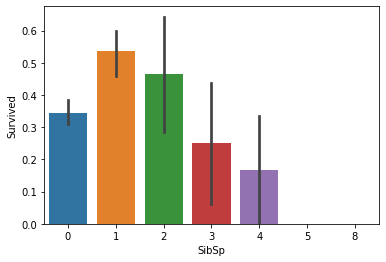

In [10]:
# observation - Has we predicted the First class people has more survival rate and also considerable amount of people are survived in second class too.
#  sibsp featute

sns.barplot(x="SibSp",y="Survived",data=Titanic_read)

print("% of people  with sibsp is 0:", Titanic_read["Survived"][Titanic_read["SibSp"]==0].value_counts(normalize="true")[1]*100)
print("% of people  with sibsp  is 1:", Titanic_read["Survived"][Titanic_read["SibSp"]==1].value_counts(normalize="true")[1]*100)
print("% of people  with sibsp  is 2:", Titanic_read["Survived"][Titanic_read["SibSp"]==2].value_counts(normalize="true")[1]*100)

% of  people with parch is 0: 34.365781710914455
% of  people with parch is 1: 55.08474576271186
% of  people with parch is 2: 50.0
% of  people with parch is 3: 60.0


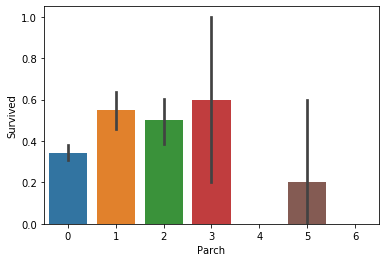

In [11]:
# observation - Generally people with more siblings or spouse were less likely would survive but here its contrary people wih no siblings are less survived vs 1 or more siblings which is 34% vs 53% vs 46%.

# parch feature

sns.barplot(x="Parch",y="Survived",data=Titanic_read)

print("% of  people with parch is 0:", Titanic_read["Survived"][Titanic_read["Parch"]==0].value_counts(normalize="true")[1]*100)
print("% of  people with parch is 1:", Titanic_read["Survived"][Titanic_read["Parch"]==1].value_counts(normalize="true")[1]*100)
print("% of  people with parch is 2:", Titanic_read["Survived"][Titanic_read["Parch"]==2].value_counts(normalize="true")[1]*100)
print("% of  people with parch is 3:", Titanic_read["Survived"][Titanic_read["Parch"]==3].value_counts(normalize="true")[1]*100)

In [12]:
# Embarked feature

    
count=Titanic_read["Embarked"]=='S'
print('s',count.sum())
count=Titanic_read["Embarked"]=='C'
print('C',count.sum())
count=Titanic_read["Embarked"]=='Q'
print('Q',count.sum())


s 644
C 168
Q 77


In [13]:
    # from above we can take s to fill the missing values
    
Titanic_read=Titanic_read.fillna({"Embarked": "S"})
Titanic_read["Embarked"].isnull().sum()

0

In [14]:
# Age feature filling missing values
# let try to fill the missing values  within a range by mean and standard deviation.
age_mean= Titanic_read['Age'].mean()
age_std=Titanic_read["Age"].std()
total_count_null= Titanic_read["Age"].isnull().sum()
age_fill_random=np.random.randint(age_mean - age_std,age_mean + age_std,size=total_count_null)
age_fill_random
Titanic_read["Age"][np.isnan(Titanic_read["Age"])]=age_fill_random
Titanic_read["Age"]=Titanic_read["Age"].astype(int)

C:\Users\venkatesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Name Feature
Titanic_read['Title']= Titanic_read['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(Titanic_read['Title'], Titanic_read['Sex'])
Titanic_read['Title'] = Titanic_read['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare')
Titanic_read['Title'] = Titanic_read['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
Titanic_read['Title'] = Titanic_read['Title'].replace(['Mlle'], 'Miss')
Titanic_read['Title'] = Titanic_read['Title'].replace(['Mme'], 'Mrs')
Titanic_read['Title'] = Titanic_read['Title'].replace(['Ms'], 'Miss')
pd.crosstab(Titanic_read['Title'], Titanic_read['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,1,19
Royal,2,1


In [16]:
# cleaning the data and mapping
# mapping title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
Titanic_read['Title'] = Titanic_read['Title'].map(title_mapping)
Titanic_read['Title'] = Titanic_read['Title'].fillna(0)

In [17]:
# Mapping Sex
Titanic_read['Sex']= Titanic_read['Sex'].fillna(0)
sex_map={"male" : 1, "female" : 0}
Titanic_read['Sex']=Titanic_read['Sex'].map(sex_map)

In [18]:
# Embarked mapping
embarked_map = {"S": 1, "C": 2, "Q": 3}
Titanic_read['Embarked'] = Titanic_read['Embarked'].map(embarked_map)

In [19]:
# Age Feature
Titanic_read['Age'] = Titanic_read['Age'].astype(int)
Titanic_read.loc[ Titanic_read['Age'] <= 11, 'Age'] = 0
Titanic_read.loc[(Titanic_read['Age'] > 11) & (Titanic_read['Age'] <= 18), 'Age'] = 1
Titanic_read.loc[(Titanic_read['Age'] > 18) & (Titanic_read['Age'] <= 22), 'Age'] = 2
Titanic_read.loc[(Titanic_read['Age'] > 22) & (Titanic_read['Age'] <= 27), 'Age'] = 3
Titanic_read.loc[(Titanic_read['Age'] > 27) & (Titanic_read['Age'] <= 33), 'Age'] = 4
Titanic_read.loc[(Titanic_read['Age'] > 33) & (Titanic_read['Age'] <= 40), 'Age'] = 5
Titanic_read.loc[(Titanic_read['Age'] > 40) & (Titanic_read['Age'] <= 66), 'Age'] = 6
Titanic_read.loc[ Titanic_read['Age'] > 66, 'Age'] = 6

In [20]:
# Fare Feature
Titanic_read['Fare'] = Titanic_read['Fare'].astype(int)
        
Titanic_read.loc[ Titanic_read['Fare'] <= 7.91, 'Fare'] = 0
Titanic_read.loc[(Titanic_read['Fare'] > 7.91) & (Titanic_read['Fare'] <= 14.454), 'Fare'] = 1
Titanic_read.loc[(Titanic_read['Fare'] > 14.454) & (Titanic_read['Fare'] <= 31), 'Fare']   = 2
Titanic_read.loc[(Titanic_read['Fare'] > 31) & (Titanic_read['Fare'] <= 99), 'Fare']   = 3
Titanic_read.loc[(Titanic_read['Fare'] > 99) & (Titanic_read['Fare'] <= 250), 'Fare']   = 4
Titanic_read.loc[ Titanic_read['Fare'] > 250, 'Fare'] = 5

In [21]:
# dropping the featutes
Titanic_read= Titanic_read.drop(['Cabin'], axis = 1)
Titanic_read= Titanic_read.drop(['Name'], axis = 1)
Titanic_read= Titanic_read.drop(['Ticket'], axis = 1)


In [22]:
Titanic_read.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,2,1,0,0,1,1
1,2,1,1,0,5,1,0,3,2,3
2,3,1,3,0,3,0,0,0,1,2
3,4,1,1,0,5,1,0,3,1,3
4,5,0,3,1,5,0,0,1,1,1
5,6,0,3,1,4,0,0,1,3,1
6,7,0,1,1,6,0,0,3,1,1
7,8,0,3,1,0,3,1,2,1,4
8,9,1,3,0,3,0,2,1,1,3
9,10,1,2,0,1,1,0,2,2,3


In [23]:
# splitting the data

from sklearn.model_selection import train_test_split

x = Titanic_read.drop(['Survived', 'PassengerId'], axis=1)
y=Titanic_read['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [24]:
# logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred
acc_logreg = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_logreg)

80.45


In [25]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_decisiontree)

80.45


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_randomforest)


83.8


In [27]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_knn)

82.12


In [28]:
# classical Naive Bayes
from sklearn.naive_bayes import CategoricalNB

classical = CategoricalNB()
classical.fit(x_train, y_train)
y_pred = classical.predict(x_test)
acc_classical = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_classical)


74.3


In [29]:
# choosing the best model
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','Naive Bayes' ],
    'Score': [acc_logreg, acc_decisiontree, acc_randomforest,acc_knn, acc_classical]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,83.80
3,KNN,82.12
0,Logistic Regression,80.45
1,Decision Tree,80.45
4,Naive Bayes,74.30


In [30]:
# feature importance:

importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.219
Sex,0.183
Age,0.162
Fare,0.122
Pclass,0.119
SibSp,0.085
Parch,0.055
Embarked,0.055


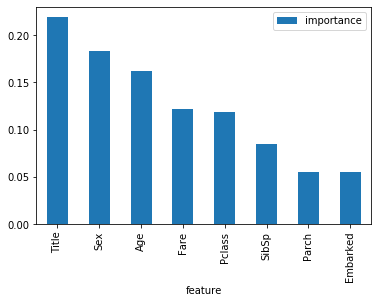

In [31]:
importances.plot.bar()

In [33]:
# Conclusion Random forest has best model with the accuracy of 83.80 and with the feature importance
# we can able to conclude that parch and Embarked doesn't play a significant role. Fare and pclass feature plays a moderate level in terms of our model.